<a href="https://colab.research.google.com/github/ginomcfino/stable-diffusion/blob/main/notebooks/my_txt2img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!nvidia-smi

Fri Oct 28 10:04:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
!git clone https://github.com/ginomcfino/stable-diffusion.git
!rm /content/stable-diffusion/models/ldm/stable-diffusion-v1/model.ckpt
# because LFS load doesn't work, uploading weights with drive is better

fatal: destination path 'stable-diffusion' already exists and is not an empty directory.


In [8]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls
%cp /content/gdrive/MyDrive/AI/stablediffusion/v1-5-pruned-emaonly.ckpt /content/stable-diffusion/models/ldm/stable-diffusion-v1/model.ckpt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	sample_data  stable-diffusion


In [9]:
%cd stable-diffusion/

/content/stable-diffusion


In [10]:
import os 
cwd = os.getcwd()
print(cwd)

/content/stable-diffusion


In [11]:
import sys
sys.path.append(cwd)
!echo $sys.path

[/content, /env/python, /usr/lib/python37.zip, /usr/lib/python3.7, /usr/lib/python3.7/lib-dynload, , /usr/local/lib/python3.7/dist-packages, /usr/lib/python3/dist-packages, /usr/local/lib/python3.7/dist-packages/IPython/extensions, /root/.ipython, /content/stable-diffusion]


In [12]:
!pip install -r requirements.txt
!pip install opencv-python
!pip install torch torchvision
!pip install omegaconf
!pip install imWatermark
!pip install einops
!pip install pytorch_lightning
!pip install --upgrade diffusers transformers scipy
!pip install taming-transformers-rom1504
!pip install clip
!pip install kornia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 117 kB 5.0 MB/s 
     |████████████████████████████████| 255 kB 30.6 MB/s 
     |████████████████████████████████| 174 kB 91.1 MB/s 
     |████████████████████████████████| 163 kB 79.5 MB/s 
     |████████████████████████████████| 61 kB 124 kB/s 
     |████████████████████████████████| 551 kB 96.4 MB/s 
ERROR: Could not find a version that satisfies the requirement numpy==1.23.4 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0rc1, 1.13.0rc2, 1.13.0, 1.13.1, 1.13.3, 1.14.0rc1, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0rc1, 1.15.0rc2, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0rc1, 1.16.0rc2, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached einops-0.5.0-py3-none-any.whl (36 kB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 708 kB 5.0 MB/s 
     |████████████████████████████████| 529 kB 75.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached diffusers-0.6.0-py3-none-any.whl (255 kB)
     |████████████████████████████████| 5.3 MB 5.1 MB/s 
  Using cached huggingface_hub-0.10.1-py3-none-any.whl (163 kB)
     |████████████████████████████████| 7.6 MB 50.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 245 kB/s 
Looking in indexes: https://pypi.org/simple, 

In [13]:
import ldm
!ls

assets		  LICENSE	       requirements.txt
configs		  main.py	       scripts
data		  models	       setup.py
environment.yaml  notebook_helpers.py  Stable_Diffusion_v1_Model_Card.md
ldm		  README.md


In [16]:
!python scripts/txt2img.py --prompt "inside of a cozy wooden library with a fireplace on a bright and snowy day" --plms

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
Moving 0 files to the new cache system
0it [00:00, ?it/s]

/content/stable-diffusion/scripts
/content/stable-diffusion

Global seed set to 42
Loading model from models/ldm/stable-diffusion-v1/model.ckpt
Global Step: 840000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.22.layer_norm1.weight', 'vision_model.encoder.layers.11.self_attn.ou

outputs/txt2img-samples/grid-0000.png


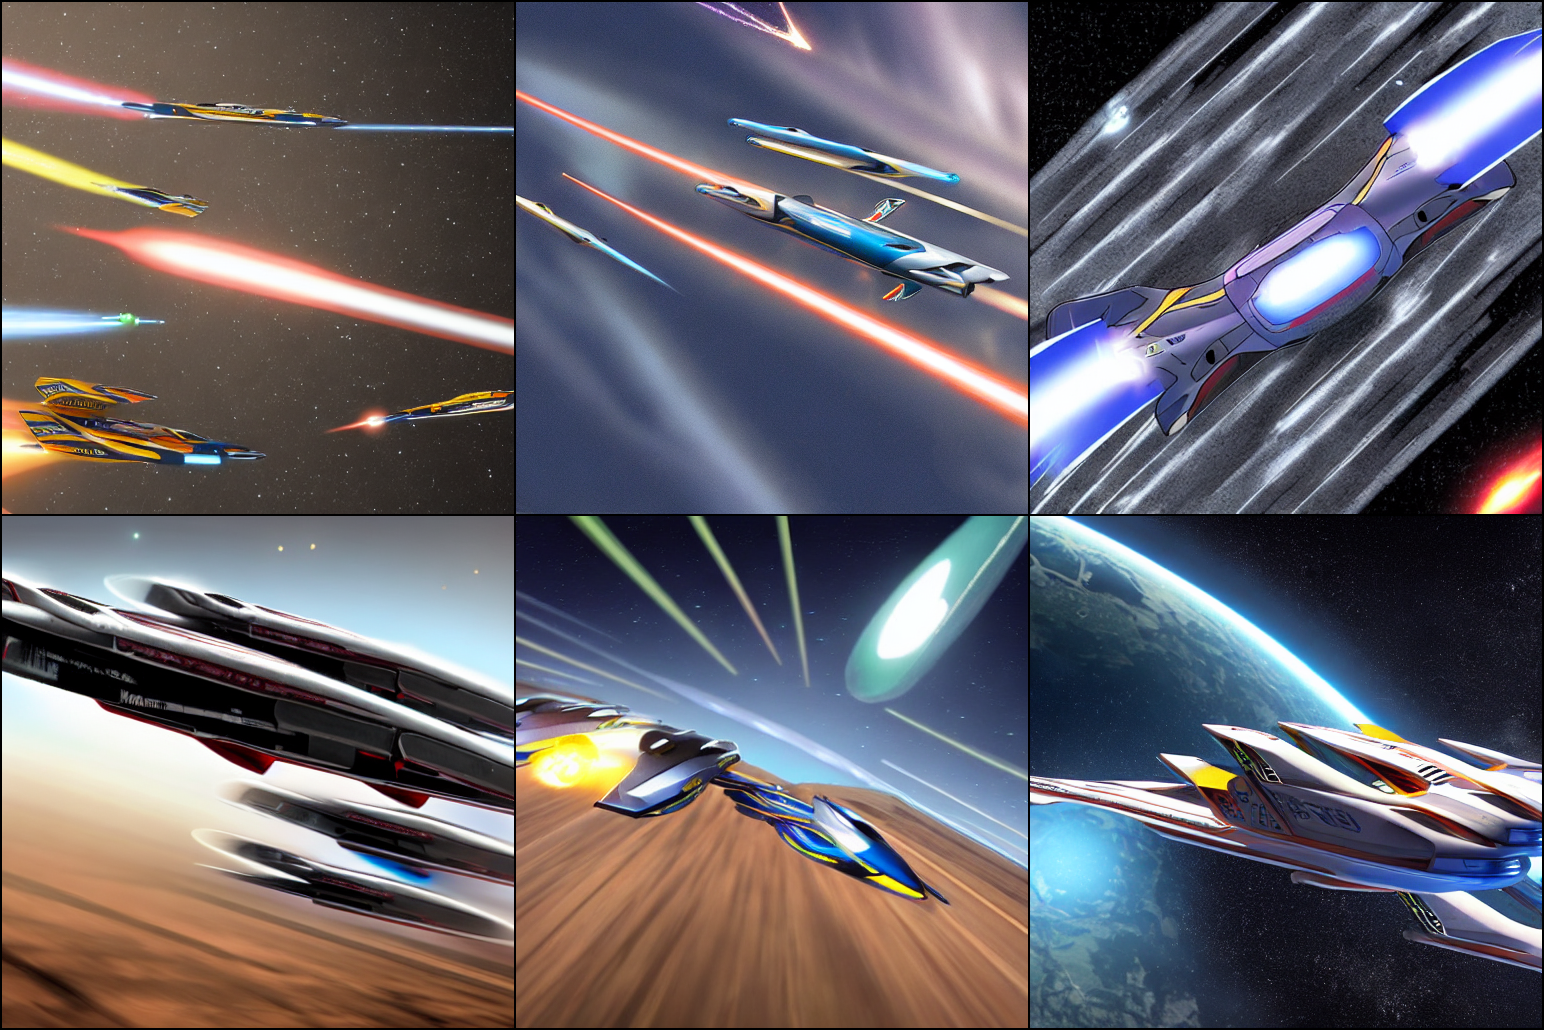

outputs/txt2img-samples/grid-0001.png


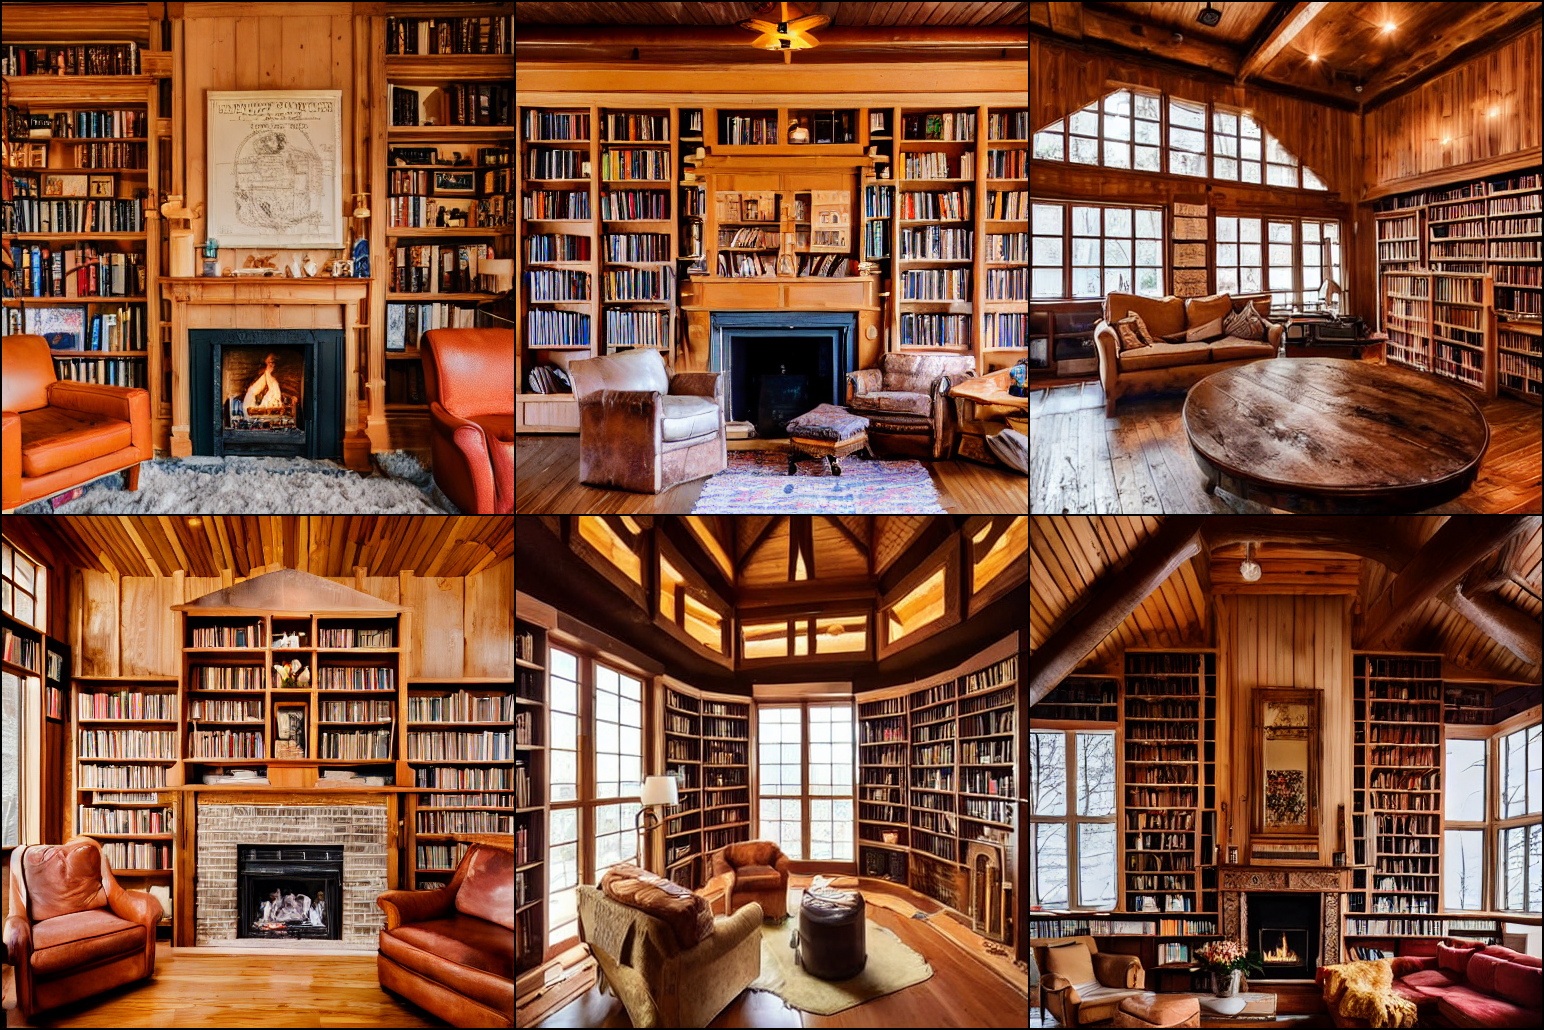

In [17]:
outpath = 'outputs/txt2img-samples/'
files = os.listdir(outpath)
images = []
for f in files:
  if f[-4:] == '.png':
    images.append(f)
images = sorted(images)
# print(images)

from IPython.display import Image, display
for img in images:
  img = outpath + img
  print(img)
  display(Image(img))